<a href="https://colab.research.google.com/github/RiyaGupta-prog/Task4/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regression**

# **Step 1: Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve


# **Step 2: Load and Clean Dataset**

In [3]:
# Load dataset
df = pd.read_csv("Breast Cancer Dataset.csv")

# Drop irrelevant columns
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

# Encode target variable (Malignant = 1, Benign = 0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


# **Step 3: Train-Test Split and Standardization**

In [4]:
# Features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **Step 4: Train Logistic Regression Model**

In [6]:
# Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]


# **Step 5: Evaluatin Matrix**

In [7]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)


Confusion Matrix:
 [[70  1]
 [ 2 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC-AUC Score: 0.99737962659679


# **Step 6: ROC Curve**

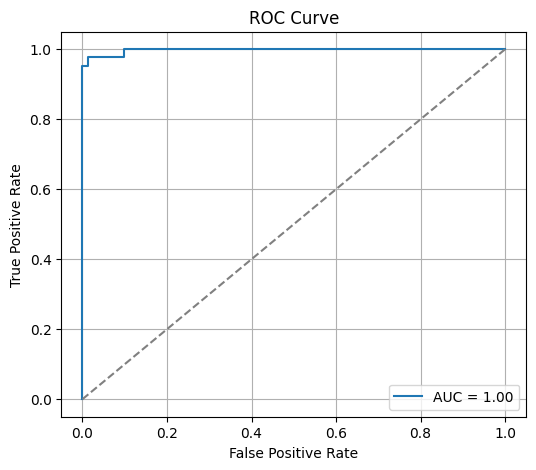

In [8]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


# **Step 7: Sigmoid Function and Curve**

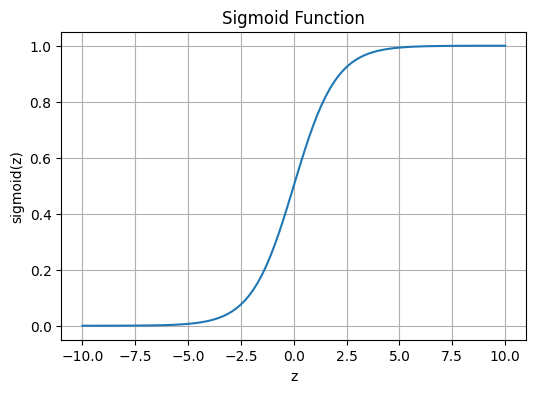

In [9]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Plot sigmoid curve
z = np.linspace(-10, 10, 100)
plt.figure(figsize=(6, 4))
plt.plot(z, sigmoid(z))
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid(True)
plt.show()
